In [1]:
import semopy as sem
import pandas as pd
import numpy as np
from semopy import Model
from semopy import Optimizer

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('Dataset.csv')
# pd.set_option('display.max_columns', None) # Changes dataframe display setting
# Display the DataFrame
df.shape
df

,address,bank,atm_id,coord_x,coord_y,freguesia,parish,mway_dist,police_dis,income,...,unp_rate,com_dens,freq_attack,success_attack,n_income,n_density,n_age,n_unp_rate,n_com_dens,n_freq_attack
0,Rua Tomas Da Fonseca TR a Lisbon,BANCO BPI S.A.,BPI17,-9.17093,38.75610,Lumiar,12,195.353440,898.569719,52,...,4,9,4,1,5,2,2,1,2,1
1,Estrada De Telheiras Lisbon,BANCO COMERCIAL PORTUGUES,CP01,-9.15911,38.76020,Lumiar,12,190.831787,568.679321,56,...,2,9,3,1,5,1,2,1,2,1
2,Rua Abranches Ferrao 8C Lisbon,BANCO COMERCIAL PORTUGUES,CP52,-9.17203,38.75064,Carnide,10,766.671635,1432.302696,52,...,9,18,3,1,5,1,2,2,2,1
3,Avenida Dom Vasco Da Gama 50 a Lisbon,BANCO SANTANDER TOTTA,ST98,-9.22544,38.69942,Belém,6,192.282794,1143.736479,36,...,15,9,3,0,3,2,4,4,2,1
4,Rua Abranches Ferrao 17-B Lisbon,BARCLAYS BANK,BB07,-9.17070,38.75117,Lumiar,12,719.798770,1371.942724,58,...,8,18,2,1,6,3,1,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,Travessa Do Castro 1 Lisbon,BANCO SANTANDER TOTTA,ST94,-9.19092,38.70430,Alcântara,1,1254.899666,1155.337295,26,...,17,9,0,0,2,4,1,4,2,0
719,Aeroporto Da Portela Lisbon,BANCO SANTANDER TOTTA,ST95,-9.13537,38.77559,Olivais,15,1173.742253,710.121989,50,...,5,9,0,0,5,1,2,2,2,0
720,Rua Rodrigo Da Fonseca 143 a Lisbon,BANCO SANTANDER TOTTA,ST96,-9.15813,38.72826,Campolide,9,1451.298659,471.645154,40,...,16,18,0,0,4,2,3,4,2,0
721,Condominio Villa Restelo - R. San Levy Lisbon,BANCO SANTANDER TOTTA,ST97,-9.13934,38.72225,Arroios,4,2939.661625,365.224278,56,...,9,9,0,0,5,1,3,2,2,0


In [3]:

data = df[['mway_dist', 'police_dis', 'com_dens','density','unp_rate','age','income','freq_attack','success_attack']]
d = data.copy()
data


,mway_dist,police_dis,com_dens,density,unp_rate,age,income,freq_attack,success_attack
0,195.353440,898.569719,9,8.0558,4,39,52,4,1
1,190.831787,568.679321,9,0.0000,2,35,56,3,1
2,766.671635,1432.302696,18,4.6250,9,34,52,3,1
3,192.282794,1143.736479,9,11.5766,15,50,36,3,0
4,719.798770,1371.942724,18,20.0926,8,29,58,2,1
...,...,...,...,...,...,...,...,...,...
718,1254.899666,1155.337295,9,27.0992,17,30,26,0,0
719,1173.742253,710.121989,9,0.1558,5,35,50,0,0
720,1451.298659,471.645154,18,13.6373,16,47,40,0,0
721,2939.661625,365.224278,9,1.5050,9,47,56,0,0


In [4]:
# cov_matrix = data.cov()

# # Print or inspect the covariance matrix
# print(cov_matrix)

In [5]:
desc = sem.examples.political_democracy.get_model()
print(desc)


# measurement model
ind60 =~ x1 + x2 + x3
dem60 =~ y1 + y2 + y3 + y4
dem65 =~ y5 + y6 + y7 + y8
# regressions
dem60 ~ ind60
dem65 ~ ind60 + dem60
# residual correlations
y1 ~~ y5
y2 ~~ y4 + y6
y3 ~~ y7
y4 ~~ y8
y6 ~~ y8


                      Value
DoF            2.800000e+01
DoF Baseline   3.500000e+01
chi2           1.910762e-04
chi2 p-value   1.000000e+00
chi2 Baseline  2.191721e+03
CFI            1.012983e+00
GFI            9.999999e-01
AGFI           9.999999e-01
NFI            9.999999e-01
TLI            1.016228e+00
RMSEA          0.000000e+00
AIC            1.600000e+01
BIC            5.266727e+01
LogLik         2.642824e-07
Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 15
Params: 0.000 0.007 0.001 0.001 -0.001 0.000 -0.000 0.142
          lval  op         rval  Estimate  Std. Err    z-value   p-value
0  freq_attack   ~     com_dens  0.000094  0.000976   0.096711  0.922956
1  freq_attack   ~          age  0.006641  0.002015   3.295919  0.000981
2  freq_attack   ~       income  0.000588  0.002564   0.229339  0.818606
3  freq_attack   ~     unp_rate  0.001397  0.006138   0.227675  0.8198

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/pranam/snap/code/common/.cache/gio-modules/libgiolibproxy.so


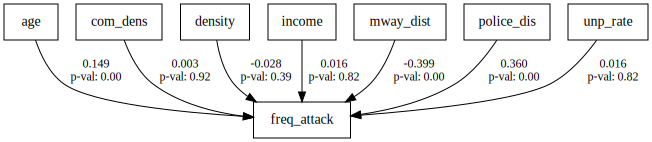

In [6]:
formula = """
freq_attack ~ com_dens + age + income + unp_rate + density + police_dis + mway_dist

"""

model = sem.Model(formula)
fit = model.fit(data, obj="MLW", solver="SLSQP")
print(sem.calc_stats(model).T)
print(fit)
print(model.inspect())
sem.semplot(model, "freq.png", plot_covs=True, std_ests=True, show=True)


eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE
/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/pranam/snap/code/common/.cache/gio-modules/libgiolibproxy.so


                      Value
DoF            2.800000e+01
DoF Baseline   3.500000e+01
chi2           1.886078e-04
chi2 p-value   1.000000e+00
chi2 Baseline  2.172763e+03
CFI            1.013098e+00
GFI            9.999999e-01
AGFI           9.999999e-01
NFI            9.999999e-01
TLI            1.016372e+00
RMSEA          0.000000e+00
AIC            1.600000e+01
BIC            5.266727e+01
LogLik         2.608683e-07
Name of objective: MLW
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.000
Number of iterations: 13
Params: 0.000 0.003 -0.000 -0.000 0.000 0.000 -0.000 0.064
             lval  op            rval  Estimate  Std. Err    z-value  \
0  success_attack   ~        com_dens  0.000334  0.000656   0.509548   
1  success_attack   ~             age  0.003061  0.001354   2.261402   
2  success_attack   ~          income -0.000407  0.001722  -0.236103   
3  success_attack   ~        unp_rate -0.000091  0.004123  -0.022082   
4

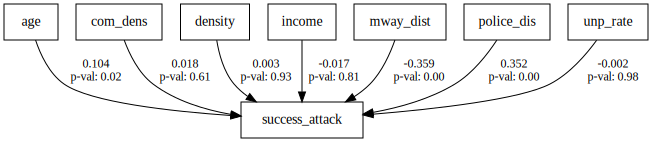

In [7]:
formula = """
success_attack ~ com_dens + age + income + unp_rate + density + police_dis + mway_dist

"""

model = sem.Model(formula)
fit = model.fit(data, obj="MLW", solver="SLSQP")
print(sem.calc_stats(model).T)
print(fit)
print(model.inspect())
sem.semplot(model, "success.png", plot_covs=True, std_ests=True, show=True)


In [8]:
d = data[(data.freq_attack > 0)]

eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


                    Value
DoF              1.000000
DoF Baseline     6.000000
chi2            81.122321
chi2 p-value     0.000000
chi2 Baseline  926.642457
CFI              0.912971
GFI              0.912456
AGFI             0.474734
NFI              0.912456
TLI              0.477828
RMSEA            0.333126
AIC             15.056578
BIC             56.307261
LogLik           1.471711
Name of objective: DWLS
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.112
Number of iterations: 48
Params: -29.610 137.375 -0.899 43.900 56.128 15692.853 27619.793 0.087 0.000
              lval  op            rval      Estimate      Std. Err    z-value  \
0              age   ~         Unknown      1.000000             -          -   
1       police_dis   ~         Unknown    -29.612368      1.571496 -18.843424   
2        mway_dist   ~         Unknown    137.520617       7.08198  19.418386   
3   success_attack   ~         success      1.00

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/pranam/snap/code/common/.cache/gio-modules/libgiolibproxy.so


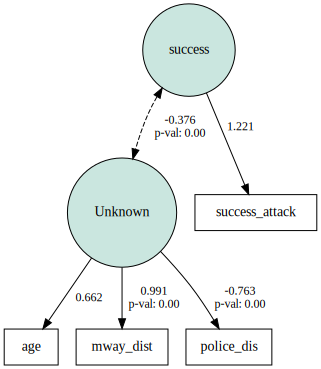

In [9]:
formula = """
Unknown =~  age + police_dis + mway_dist 
success =~   success_attack
Unknown  ~~ success
"""

model = sem.Model(formula)
model.load_dataset(d)
opt = sem.Optimizer(model)
objective_function_value = opt.optimize()

# print('ULS ',opt.optimize('ULS'))
opt.optimize('MLW')
fit = model.fit(data, obj="DWLS", solver="SLSQP")  #MLW ULS GLS FIML DWLS WLS
sem.bias_correction(model, n=1000, resample_mean=True)
print(sem.calc_stats(model).T)
print(fit)
print(model.inspect())
sem.semplot(model, "success.png", plot_covs=True, std_ests=True, show=True)


eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE


                      Value
DoF            2.000000e+00
DoF Baseline   6.000000e+00
chi2           4.048555e+01
chi2 p-value   1.616868e-09
chi2 Baseline  9.266425e+02
CFI            9.581971e-01
GFI            9.563094e-01
AGFI           8.689283e-01
NFI            9.563094e-01
TLI            8.745912e-01
RMSEA          1.632545e-01
AIC            1.553216e+01
BIC            5.219943e+01
LogLik         2.339215e-01
Name of objective: DWLS
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.056
Number of iterations: 48
Params: -25.760 96.543 -0.020 54.486 46.007 455394.601 51585.972 0.066
             lval  op            rval       Estimate      Std. Err    z-value  \
0             age   ~         Unknown       1.000000             -          -   
1      police_dis   ~         Unknown     -25.886793      1.872791 -13.822576   
2       mway_dist   ~         Unknown      95.788262      6.586253  14.543666   
3  success_attack   ~   

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/pranam/snap/code/common/.cache/gio-modules/libgiolibproxy.so


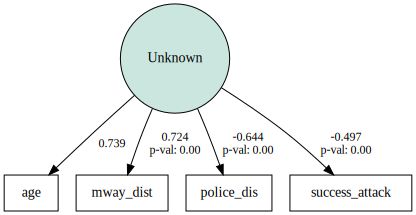

In [10]:

formula = """
Unknown =~  age + police_dis + mway_dist 
success_attack ~  Unknown

"""

model = sem.Model(formula)
fit = model.fit(data, obj="DWLS", solver="SLSQP")  #MLW ULS GLS FIML DWLS WLS
sem.bias_correction(model, n=50, resample_mean=False)
print(sem.calc_stats(model).T)
print(fit)
print(model.inspect())
sem.semplot(model, "success.png", plot_covs=True, std_ests=True, show=True)


                      Value
DoF            1.000000e+00
DoF Baseline   6.000000e+00
chi2           4.072445e+01
chi2 p-value   1.752805e-10
chi2 Baseline  9.266425e+02
CFI            9.568514e-01
GFI            9.560516e-01
AGFI           7.363096e-01
NFI            9.560516e-01
TLI            7.411083e-01
RMSEA          2.345634e-01
AIC            1.752922e+01
BIC            5.877991e+01
LogLik         2.353880e-01
Name of objective: DWLS
Optimization method: SLSQP
Optimization successful.
Optimization terminated successfully
Objective value: 0.056
Number of iterations: 41
Params: -26.235 98.044 -0.020 53.065 47.763 455394.601 51585.973 0.065 0.001
              lval  op            rval       Estimate       Std. Err  \
0          success   ~               L      -0.020041        0.00182   
1              age   ~               L       1.000000              -   
2       police_dis   ~               L     -26.234726       1.925755   
3        mway_dist   ~               L      98.043694 

eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE
/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/pranam/snap/code/common/.cache/gio-modules/libgiolibproxy.so


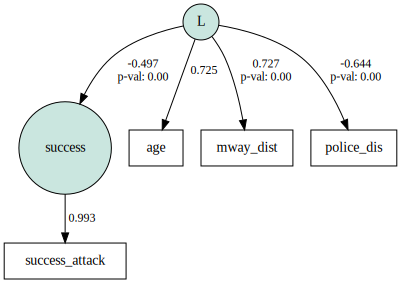

In [11]:

formula = """
L =~  age + police_dis + mway_dist 
success =~ success_attack
success ~  L

"""

model = sem.Model(formula)
fit = model.fit(data, obj="DWLS", solver="SLSQP")  #MLW ULS GLS FIML DWLS WLS
# sem.bias_correction(model, n=50, resample_mean=False)
print(sem.calc_stats(model).T)
print(fit)
print(model.inspect())
sem.semplot(model, "success.png", plot_covs=True, std_ests=True, show=True)


In [12]:
#ecellent with nan
# formula = """
# Unknown =~  age + police_dis + mway_dist 
# success =~  success_attack 
#  Unknown  ~~ success
# """

# model = sem.Model(formula)
# fit = model.fit(data, obj="DWLS", solver="SLSQP")
# sem.bias_correction(model, n=50, resample_mean=False)
# print(sem.calc_stats(model).T)
# print(fit)
# print(model.inspect())
# sem.semplot(model, "success.png", plot_covs=True, std_ests=True, show=True)


In [13]:
# Moderate
# formula = """
# Unknown =~  age + police_dis + mway_dist 
# success_attack ~  Unknown

# """

# model = sem.Model(formula)
# fit = model.fit(data, obj="DWLS", solver="SLSQP")
# sem.bias_correction(model, n=50, resample_mean=False)
# print(sem.calc_stats(model).T)
# print(fit)
# print(model.inspect())
# sem.semplot(model, "success.png", plot_covs=True, std_ests=True, show=True)


In [14]:
# GOOD
# formula = """
# Unknown =~  age + police_dis + mway_dist 
# success_attack ~  Unknown

# """

# model = sem.Model(formula)
# fit = model.fit(data, obj="DWLS", solver="SLSQP")  #MLW ULS GLS FIML DWLS WLS
# sem.bias_correction(model, n=50, resample_mean=False)
# print(sem.calc_stats(model).T)
# print(fit)
# print(model.inspect())
# sem.semplot(model, "success.png", plot_covs=True, std_ests=True, show=True)


In [15]:
# Good 2
# formula = """
# Unknown =~  age + police_dis + mway_dist 
# success =~ success_attack
# success ~  Unknown

# """

# model = sem.Model(formula)
# fit = model.fit(data, obj="DWLS", solver="SLSQP")  #MLW ULS GLS FIML DWLS WLS
# sem.bias_correction(model, n=50, resample_mean=False)
# print(sem.calc_stats(model).T)
# print(fit)
# print(model.inspect())
# sem.semplot(model, "success.png", plot_covs=True, std_ests=True, show=True)


eog: symbol lookup error: /snap/core20/current/lib/x86_64-linux-gnu/libpthread.so.0: undefined symbol: __libc_pthread_init, version GLIBC_PRIVATE
